Explore Pre-Snap Metrics Data
==========================

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

# open processed pre-snap data, confirm that shape looks correct
df_pre = pd.read_csv("../data/processed/plays_and_targets_week_1.csv")
print(df_pre.shape)

(1906, 10)


In [45]:
#remove non-success values
df = df_pre[ df_pre["targetDiff"] != 0 ]

print(df.shape)
print(df.columns.values)

(1155, 10)
['gameId' 'playId' 'maxOffenseSpeed' 'maxDefenseSpeed'
 'offenseDistanceTraveled' 'defenseDistanceTraveled' 'elapsedTime'
 'offenseTarget' 'defenseTarget' 'targetDiff']


In [46]:
off_dist    = df["offenseDistanceTraveled"].values
def_dist    = df["defenseDistanceTraveled"].values
target_diff = df["targetDiff"].values

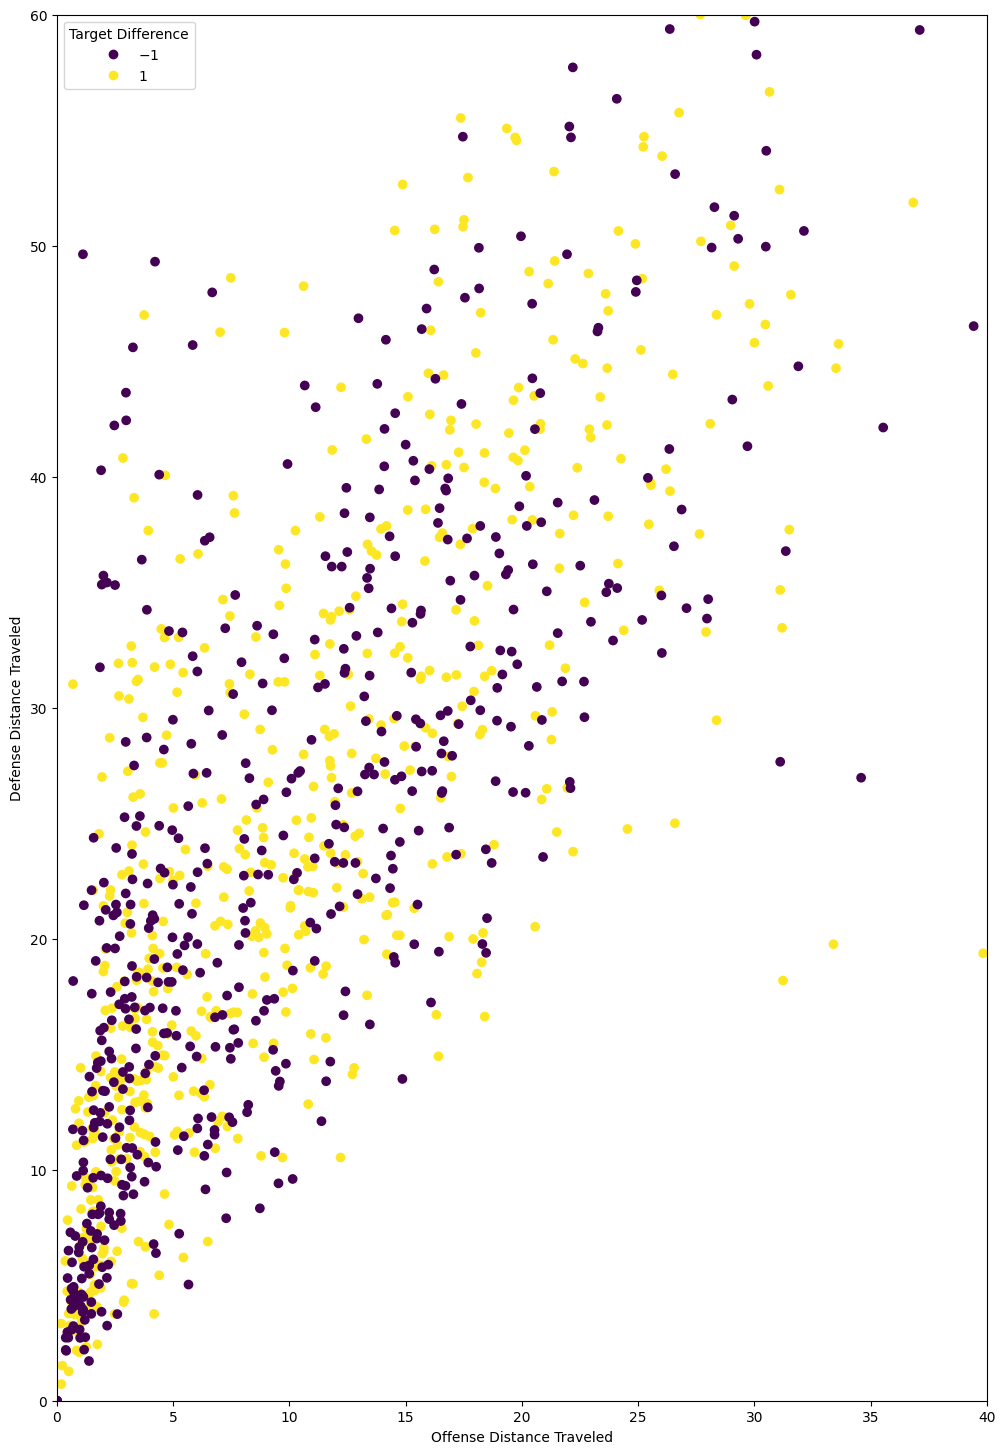

In [47]:
fig, ax = plt.subplots(figsize=(12,18))
scatter = ax.scatter(off_dist, def_dist, c=target_diff)
ax.set_xlabel("Offense Distance Traveled")
ax.set_ylabel("Defense Distance Traveled")

ax.set_xlim(0,40)
ax.set_ylim(0,60)

handles, labels = scatter.legend_elements()
ax.legend(handles, labels, title="Target Difference")

plt.show()

In [48]:
# print offensive successes in the range of 33 to 40 yard offense distance traveled
df_top_offense_success = df[ ( df[ "offenseDistanceTraveled" ] <= 40 ) & \
                             ( df[ "offenseDistanceTraveled" ] >= 33 ) & \
                             ( df[ "targetDiff" ] == 1 ) ].copy()
df_top_offense_success.sort_values(by="offenseDistanceTraveled", inplace=True, ascending=False)
print(df_top_offense_success[[ "gameId", "playId", 
                               "offenseDistanceTraveled", "defenseDistanceTraveled" ]].to_string(index=False))

    gameId  playId  offenseDistanceTraveled  defenseDistanceTraveled
2022091100    2114                    39.84                    19.37
2022091200    3723                    37.69                    78.50
2022091100     996                    37.64                    64.65
2022091101    3789                    36.83                    51.87
2022091100    2960                    33.62                    45.75
2022091107    1642                    33.51                    63.53
2022091104     462                    33.51                    44.70
2022091105    1589                    33.40                    19.76


In [49]:
# print defensive successes in the range of 55 to 60 yard offense distance traveled
df_top_defense_success = df[ ( df[ "defenseDistanceTraveled" ] <= 60 ) & \
                             ( df[ "defenseDistanceTraveled" ] >= 55 ) & \
                             ( df[ "targetDiff" ] == -1 ) ].copy()
df_top_defense_success.sort_values(by="defenseDistanceTraveled", inplace=True, ascending=False)
print(df_top_defense_success[[ "gameId", "playId", "offenseDistanceTraveled", 
                              "defenseDistanceTraveled" ]].to_string(index=False))


    gameId  playId  offenseDistanceTraveled  defenseDistanceTraveled
2022091112     508                    30.01                    59.70
2022091111    1567                    26.36                    59.38
2022091101    1537                    37.11                    59.34
2022091100     719                    46.44                    59.01
2022091104    2952                    30.09                    58.27
2022091102     488                    22.19                    57.72
2022091113    2077                    24.08                    56.36
2022091104    3754                    22.04                    55.16
